In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

# Places and Points of Interest from OpenStreetMap

The Open Street Map is a community crowd-sourced open database of relatively fixed geospatial features, such as roads, buildings, points of interest, natural features, land use, etc. While not an exhaustive resource, Open Street Map points of interest are a useful first pass at identifying concentrations of activity -- e.g., financial services, health facilities, education facilities, and others. The following three maps show concentrations of identified points of interest for select sectors in Egypt. 

In [3]:
egypt_adm3 = gpd.read_file('../../data/shapefiles/egy_admbnda_adm3_capmas_20170421.shp')
egypt_adm2 = gpd.read_file('../../data/shapefiles/egy_admbnda_adm2_capmas_20170421/egy_admbnda_adm2_capmas_20170421.shp')
egypt_adm1 = gpd.read_file('../../data/shapefiles/egy_admbnda_adm1_capmas_20170421/egy_admbnda_adm1_capmas_20170421.shp')

In [4]:
pois = gpd.read_file('../../data/osm/egypt-latest-free.shp/gis_osm_pois_free_1.shp')

In [5]:
places = gpd.read_file('../../data/osm/egypt-latest-free.shp/gis_osm_places_a_free_1.shp')

In [6]:
def get_poi_classification(code):
    if code <=2034:
        return 'public'
    elif code<=2099 and code>=2080:
        return 'education'
    elif code <= 2129:
        return 'health'
    elif code<=2257:
        return 'leisure'
    elif code<=2307:
        return 'catering'
    elif code<=2424:
        return 'accommodation'
    elif code<=2592:
        return 'shopping'
    elif code<=2602:
        return 'money'
    elif code<=2744:
        return 'tourism'
    elif code<=2964:
        return 'misc'

In [7]:
pois['poi_class'] = pois['code'].apply(lambda x: get_poi_classification(x))

(24.083797605650062, 37.519417371350045, 21.515570128300077, 32.15383756370003)

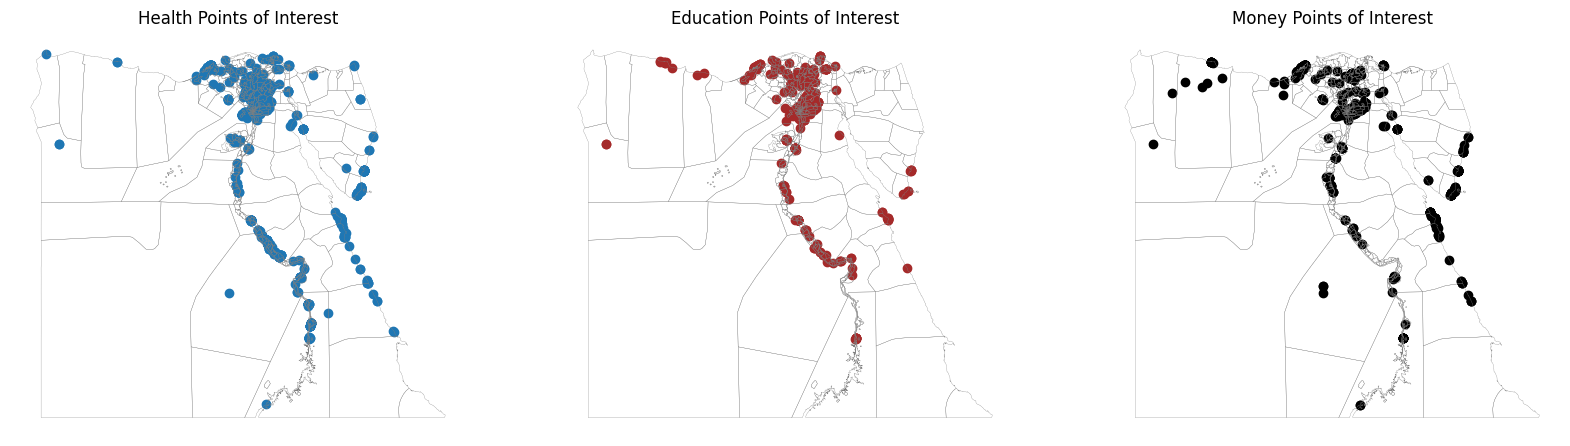

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(20,8))

pois[pois['poi_class']=='health'].plot(ax=ax[0])
egypt_adm2.boundary.plot(linewidth=0.2, color ='grey', ax=ax[0])
ax[0].set_title('Health Points of Interest', fontsize=12, ha='center')
ax[0].axis('off')

pois[pois['poi_class']=='education'].plot(ax=ax[1], color = 'brown')
egypt_adm2.boundary.plot(linewidth=0.2, color ='grey', ax=ax[1])
ax[1].set_title('Education Points of Interest', fontsize=12, ha='center')
ax[1].axis('off')

pois[pois['poi_class']=='money'].plot(ax=ax[2], color='black')
egypt_adm2.boundary.plot(linewidth=0.2, color ='grey', ax=ax[2])
ax[2].set_title('Money Points of Interest', fontsize=12, ha='center')
ax[2].axis('off')

## Combining Relative Wealth Index and OpenStreetMap Points of Interest

<iframe width="100%" height="500px" src="https://studio.foursquare.com/public/848b312f-f47b-4185-840d-1253aa5de039/embed" frameborder="0" allowfullscreen></iframe>

The following map is interactive. By clicking the "eye" icons on the map, the user can explore either the locations of different points of interest or the locations of welath concentrations (or both, overlaid upon each other). 

In [42]:
pois.to_file('../../data/osm/pois_classified.shp', format = 'ESRI Shapefile')